In [0]:
import torch.nn as nn
import librosa
import numpy as np
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

In [193]:
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/Colab Notebooks')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# from google.colab import files
# files.upload()


In [0]:
# files.upload()

In [0]:
s, sr=librosa.load('data/train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('data/train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [0]:
s_abs = np.abs(S)
x_abs = np.abs(X)
s = np.transpose(s_abs)
x = np.transpose(x_abs)

In [197]:
print(s.shape[0])
print(x.shape)

2459
(2459, 513)


In [0]:
def data_preprocessing(frames):
  target_frames = []
  for t in range(frames.shape[0]-19):
    frame = frames[t:t+20,:]
    target_frames.append(frame)
  return target_frames
  
  

In [0]:
x_frames = data_preprocessing(x)
target_frames = data_preprocessing(s)


In [200]:
np.array(x_frames).shape
np.array(x_frames[0])

array([[1.29152825e-02, 7.06597278e-03, 3.11613153e-03, ...,
        5.43509632e-05, 4.78351954e-04, 6.20555074e-04],
       [8.45048483e-03, 8.67099315e-03, 2.38854997e-02, ...,
        4.29546135e-03, 3.05002742e-03, 3.61816579e-04],
       [2.07481943e-02, 2.41626706e-02, 1.21732401e-02, ...,
        2.38031521e-03, 5.98413777e-03, 1.19814684e-03],
       ...,
       [1.74660143e-02, 4.83949780e-02, 1.34069741e-01, ...,
        1.65422842e-01, 1.70927361e-01, 5.71105704e-02],
       [2.56799404e-02, 5.20184524e-02, 4.85781282e-02, ...,
        1.06058657e-01, 9.93818268e-02, 2.23836824e-01],
       [4.23038518e-03, 5.08374609e-02, 8.02072510e-02, ...,
        1.16350770e-01, 9.33480784e-02, 2.18564998e-02]], dtype=float32)

In [0]:
# x_frames = []
# target_frames = []
# for t in range(s.shape[0]-19):
#     frame_x = s[t:t+20,:]
# #     print(frame_x.shape)
#     frame_y = x[t:t+20,:]
#     x_frames.append(frame_x)
#     target_frames.append(frame_y)

# print(np.array(x_frames).shape)
# print(np.array(target_frames).shape)

# print(x_frames[2439].shape)

In [202]:
BATCH = 32
train_loader = torch.utils.data.DataLoader(x_frames, batch_size=BATCH)
test_loader = torch.utils.data.DataLoader(target_frames, batch_size=BATCH)
print(len(train_loader))
print(len(test_loader))

77
77


In [0]:
# test_iter = iter(train_loader)
# test_data = test_iter.next()
# print(test_data.shape)

In [0]:
# my_data = test_data.squeeze().cuda()
# print(my_data.shape)

In [205]:
def get_shape(input, filter, padding, stride):
    return (((input - filter + (2*padding)) / stride)) + 1

get_shape(512, 2,0, 1)

511.0

In [0]:
class NeuralNetwork(nn.Module):
  
    def __init__(self):
        super(NeuralNetwork, self).__init__()


        self.conv1 = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=2, stride=1),
                nn.ReLU(),       
                nn.MaxPool2d(kernel_size=2, stride=1))


        self.conv2 = nn.Sequential(
                nn.Conv2d(16,32, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=1))
        
        self.conv2 = nn.Sequential(
                nn.Conv2d(16,32, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=1))


        self.fc1 = nn.Linear(in_features=int(260608), out_features=130304)
#         self.fc2 = nn.Linear(in_features=int(130304), out_features=513)

    def forward(self, data):

        data = data[:,np.newaxis,:, :]
#         print("first")
#         print(data.shape)
        output = self.conv1(data)
#         print("output from first")
#         print(data.shape)
        output = self.conv2(output)
#         print("output from second")
#         print(output.shape)
        output = output.reshape(output.shape[0], -1)
#         print("input to fully connected")
#         print(output.shape)
        output = self.fc1(output)
#         output = self.fc2(output)
    #     final = torch.nn.functional.relu(output)
        final = output
#         print("final shape")
#         print(final.shape)
        return final

In [0]:
neural_network = NeuralNetwork().cuda()

tensor(0.1117, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0067, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0036, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward

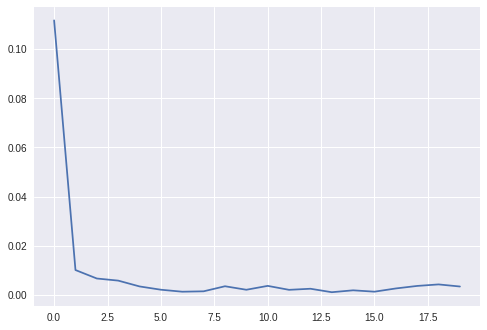

In [208]:
loss_function= nn.MSELoss()
para = neural_network.parameters()
optimizer = torch.optim.Adam(params=para, lr=0.001)
loss_list = []
epochs = 20
for i in range(epochs):
    input_iter = iter(train_loader)
    target_iter = iter(test_loader)
    index = 19
    while True:
        try:
            input_set = input_iter.next()
            target_set = target_iter.next()
            input_set = input_set.cuda()
            target_set = target_set.cuda()
            optimizer.zero_grad()
            network_output  = neural_network(input_set)
#             print("target set")
#             print(target_set.shape)
#             print("network shape")
#             print(network_output.shape)
            loss = loss_function(network_output , target_set[:,index,:])
#             index + 20
            loss.backward()
            optimizer.step()
        except StopIteration:
            break
#     if i% 25 == 0:
    print(loss)
    loss_list.append(loss.data.cpu().numpy())
print(loss.data)
plt.plot(range(epochs), loss_list)
plt.show()      

In [209]:
each_array = [0] * 513
output_list = np.array([each_array] * 19)
len(output_list)
output_list

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
def test_audio(input_file_path, output_file_path):
    st, sr=librosa.load(input_file_path, sr=None)
    test = librosa.stft(st, n_fft=1024, hop_length=512)
#     print(test.shape)
    test_abs = torch.tensor(np.abs(test))
    test_abs = data_preprocessing(np.transpose(test_abs))
#     print('lenght of test_abs')
#     print(len(test_abs))
#     print(test_abs[0].shape)
    test_loader = torch.utils.data.DataLoader(test_abs, batch_size=BATCH)
    t_iter = iter(test_loader)
#     print(len(t_iter))
    with torch.no_grad():
        each_array = [0] * 513
        output_list = np.array([each_array] * 19)
#         print("initial shape")
#         print(output_list.shape)
        while True:
            try:
#                 print("inside")
                data = t_iter.next()
#                 print(data.shape)
                data = data.cuda()
                output = neural_network(data)
                output = output.cpu().numpy()
#                 print('output shape')
#                 print(output.shape)
#                 print('list shape')
#                 print(output_list.shape)
                output_list = np.concatenate((output_list, output), 0)
#                 np.stack(output_list, output)
            except StopIteration:
#                 print("break")
                break 
#         print(output_list.shape)
#         output_list = np.concatenate(output_list, axis= 1)
        spec = (test / np.abs(test)) * output_list.T
        spec_istft = librosa.istft(spec, hop_length=512)
        librosa.output.write_wav(output_file_path, spec_istft, sr)

In [0]:
# testing on the audio 1
test_audio('data/test_x_01.wav', 'test_s_01_recons.wav')

In [212]:
ipd.Audio('test_s_01_recons.wav')

In [0]:
# ipd.Audio('test_s_01_recons.wav')

In [0]:
# testing on the audio 2
# test_audio('data/test_x_02.wav', 'test_s_02_recons.wav')


In [0]:
# ipd.Audio('test_s_02_recons.wav')

In [0]:
#checking how the original train file comes out to be
# test_audio('data/train_dirty_male.wav', 'train_dirty_male_recons.wav')

In [0]:
# ipd.Audio('train_dirty_male_recons.wav')